# OZIBOOK ASSESSMENT WITH PYTHON

## Importing necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Open File

In [2]:
vg_sales = pd.read_csv("vgsales.csv")
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
vg_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 271 observations have no values for Year and 58 empty for publishers.
## Investigate the information with null values and see why they are empty in order to replace them.
## For the sake of this assessment, we are going to drop the observations with null values.

In [5]:
vg_sales = vg_sales.dropna()

In [6]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Convert the Year column to integer

In [7]:
vg_sales["Year"] = vg_sales["Year"].astype("int64")
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Extracting observations from year 2000

In [8]:
new_vg = vg_sales[vg_sales["Year"] >= 2000]
new_vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


# Visualizations

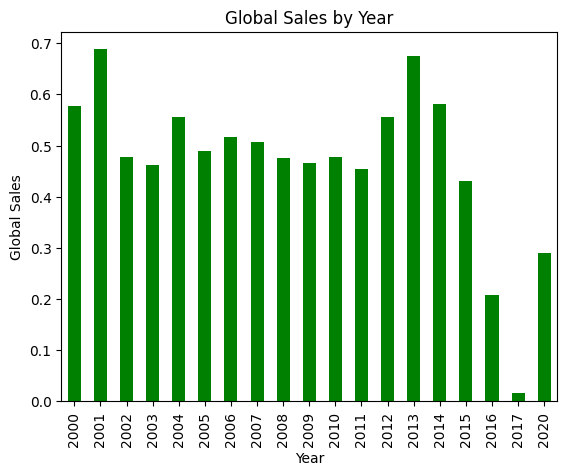

In [9]:
year = new_vg.groupby(["Year"])["Global_Sales"].mean()
year.plot(kind = "bar", xlabel = "Year", ylabel = "Global Sales", title = "Global Sales by Year", color = "green");

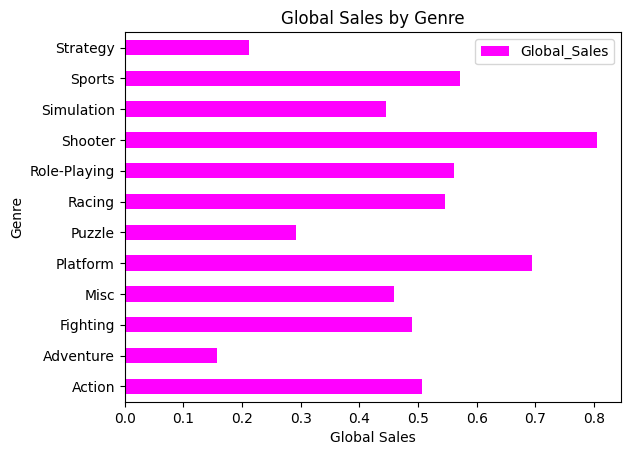

In [10]:
genre = new_vg.groupby(["Genre"])[["Global_Sales"]].mean()
genre.plot(kind = "barh", xlabel = "Global Sales", ylabel = "Genre", title = "Global Sales by Genre", color = "magenta");

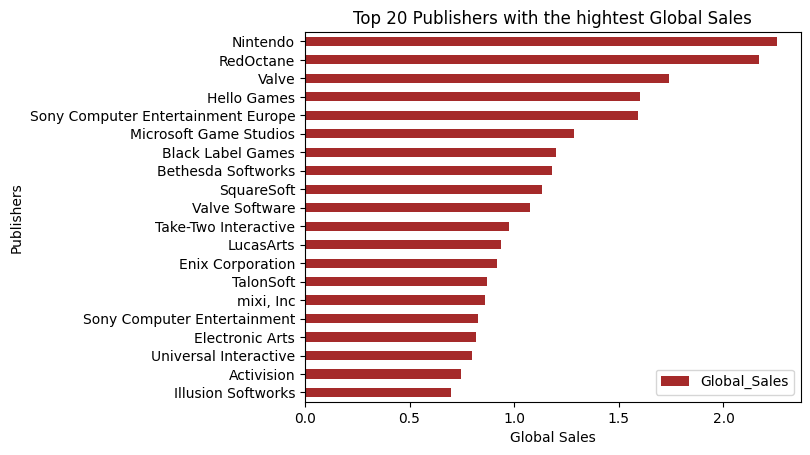

In [11]:
publisher = new_vg.groupby(["Publisher"])[["Global_Sales"]].mean().sort_values(by = ["Global_Sales"],ascending = True).tail(20)
publisher.plot(kind = "barh", xlabel = "Global Sales", ylabel = "Publishers", 
               title = "Top 20 Publishers with the hightest Global Sales", color = "brown");

## Exploring futher the Top Publisher (**NINTENDO**)

In [12]:
nintendo = new_vg[new_vg["Publisher"] == "Nintendo"]
nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


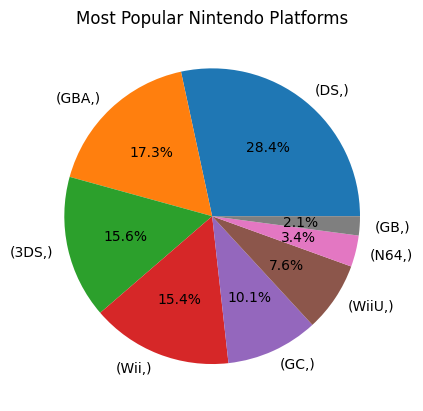

In [13]:
# Most popular Nintendo Platform
nin_plat = nintendo[["Platform"]].value_counts()
nin_plat.plot(kind = "pie", title = "Most Popular Nintendo Platforms", autopct = "%1.1f%%");

# **Insights**

## The **SHOOTER** Genre records the highest Global Sales record while **Adventure** records the least.
## **Nintendo** Publishers has the highest sales record followed by the **RedOctane**

## The Most Popular Platform used by Nintendo Publishers is the **DS** Platform